# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

## Step 1: Read in Data

In [166]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

%matplotlib inline

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)

In [86]:
df = pd.read_csv('kc_house_data_train.csv')

In [87]:
df.shape

(17290, 22)

In [88]:
# df.describe()

In [89]:
# df.info()

In [90]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [91]:
df.drop(columns=['Unnamed: 0', 'date'], inplace = True)

In [92]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

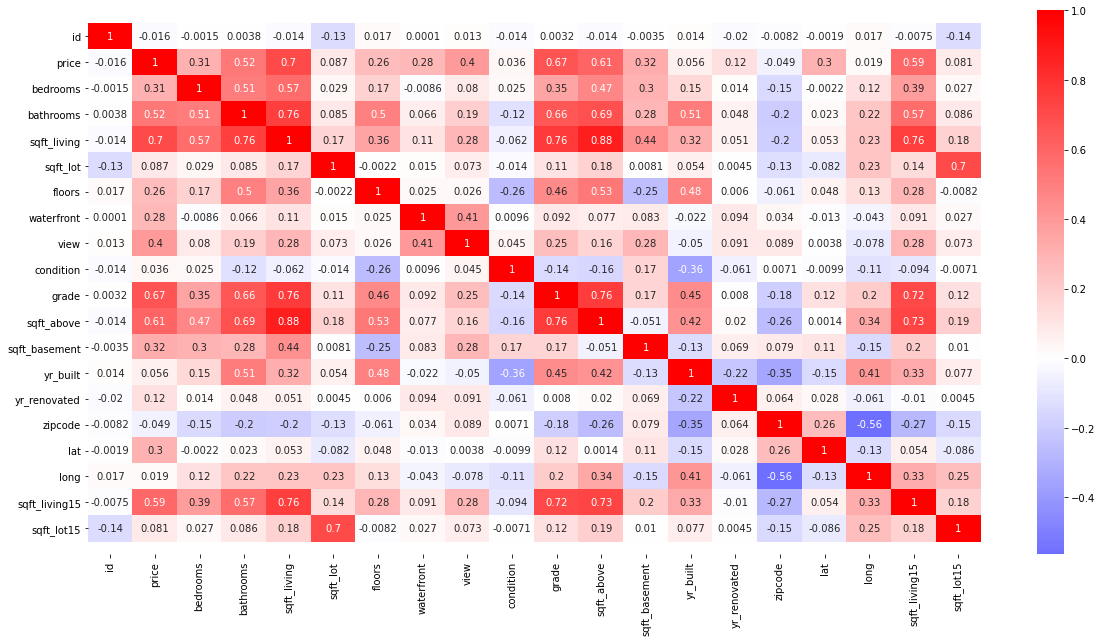

In [93]:
fig, ax = plt.subplots(figsize=(20,10)) # figsize to make larger
sns.heatmap(df.corr(), cmap='bwr', center=0, annot=True)
# OPTIONAL: fix for matplotlib bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

In [164]:
# import matplotlib.pyplot as plt
# %matplotlib inline

# fig , axes = plt.subplots(8,2, figsize = (22,70))

# axes[0][0].set_title('bathrooms', fontsize = 22)
# axes[0][1].set_title('bedrooms', fontsize = 22)
# axes[1][0].set_title('condition', fontsize = 22)
# axes[1][1].set_title('floors', fontsize = 22)
# axes[2][0].set_title('grade', fontsize = 22)
# axes[2][1].set_title('sqft_above', fontsize = 22)
# axes[3][0].set_title('sqft_basement', fontsize = 22)
# axes[3][1].set_title('sqft_living', fontsize = 22)
# axes[4][0].set_title('sqft_lot', fontsize = 22)
# axes[4][1].set_title('sqft_living15', fontsize = 22)
# axes[5][0].set_title('sqft_lot15', fontsize = 22)
# axes[5][1].set_title('view', fontsize = 22)
# axes[6][0].set_title('waterfront', fontsize = 22)
# axes[6][1].set_title('yr_built', fontsize = 22)
# axes[7][0].set_title('yr_renovated', fontsize = 22)
# axes[7][1].set_title('zipcode', fontsize = 22)

# axes[0][0].boxplot(df['bathrooms'])
# axes[0][1].boxplot(df['bedrooms'])
# axes[1][0].boxplot(df['condition'])
# axes[1][1].boxplot(df['floors'])
# axes[2][0].boxplot(df['grade'])
# axes[2][1].boxplot(df['sqft_above'])
# axes[3][0].boxplot(df['sqft_basement'])
# axes[3][1].boxplot(df['sqft_living'])
# axes[4][0].boxplot(df['sqft_lot'])
# axes[4][1].boxplot(df['sqft_living15'])
# axes[5][0].boxplot(df['sqft_lot15'])
# axes[5][1].boxplot(df['view'])
# axes[6][0].boxplot(df['waterfront'])
# axes[6][1].boxplot(df['yr_built'])
# axes[7][0].boxplot(df['yr_renovated'])
# axes[7][1].boxplot(df['zipcode'])

# # axes[0][0].set_ytick()
# axes[0][0].set_yticklabels(df['bathrooms'], fontsize = 17)
# axes[0][1].set_yticklabels(df['bedrooms'], fontsize = 17)
# axes[1][0].set_yticklabels(df['condition'], fontsize = 17)
# axes[1][1].set_yticklabels(df['floors'], fontsize = 17)
# axes[2][0].set_yticklabels(df['grade'], fontsize = 17)
# axes[2][1].set_yticklabels(df['sqft_above'], fontsize = 17)
# axes[3][0].set_yticklabels(df['sqft_basement'], fontsize = 17)
# axes[3][1].set_yticklabels(df['sqft_living'], fontsize = 17)
# axes[4][0].set_yticklabels(df['sqft_lot'], fontsize = 17)
# axes[4][1].set_yticklabels(df['sqft_living15'], fontsize = 17)
# axes[5][0].set_yticklabels(df['sqft_lot15'], fontsize = 17)
# axes[5][1].set_yticklabels(df['view'], fontsize = 17)
# axes[6][0].set_yticklabels(df['waterfront'], fontsize = 17)
# axes[6][1].set_yticklabels(df['yr_built'], fontsize = 17)
# axes[7][0].set_yticklabels(df['yr_renovated'], fontsize = 17)
# axes[7][1].set_yticklabels(df['zipcode'], fontsize = 17)
                      
# plt.subplots_adjust(hspace = .2)

Text(0, 0.5, 'zipcode')

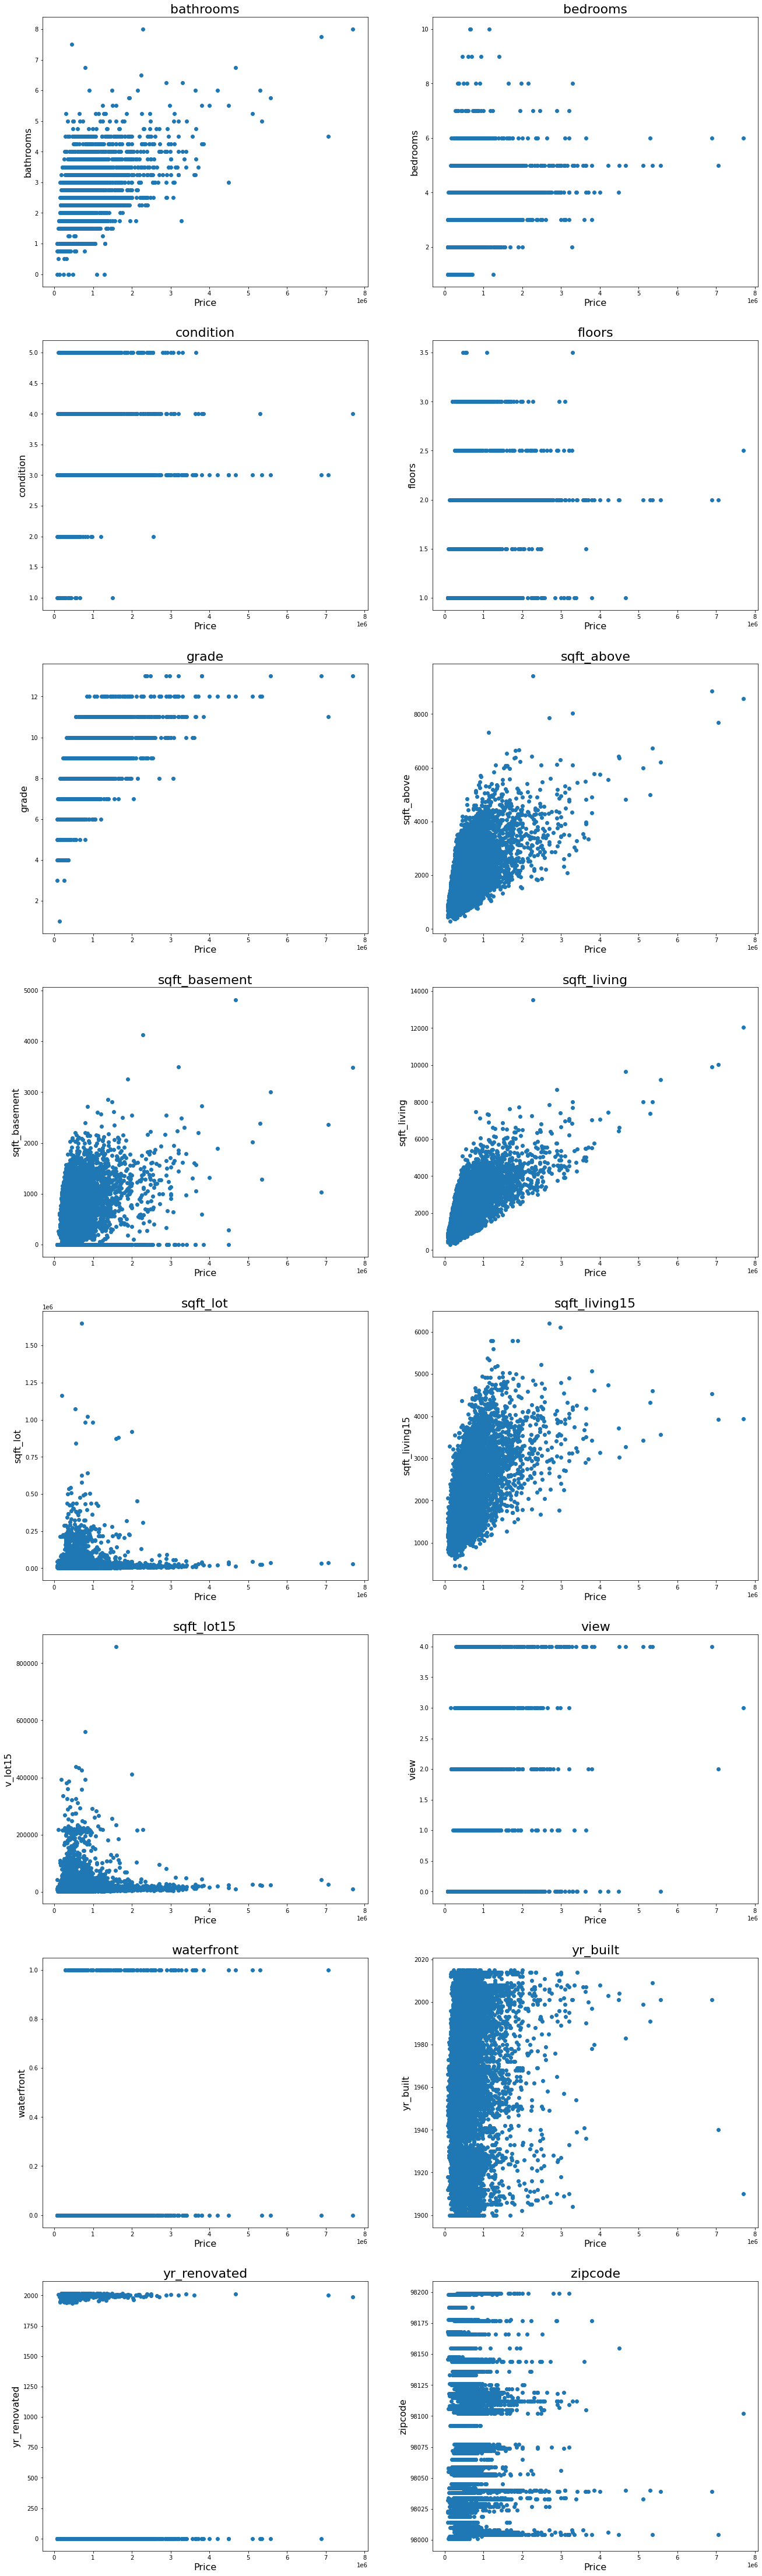

In [165]:
fig , axes = plt.subplots(8,2, figsize = (22,80))

axes[0][0].scatter(df['price'], df['bathrooms'])
axes[0][1].scatter(df['price'], df['bedrooms'])
axes[1][0].scatter(df['price'], df['condition'])
axes[1][1].scatter(df['price'], df['floors'])
axes[2][0].scatter(df['price'], df['grade'])
axes[2][1].scatter(df['price'], df['sqft_above'])
axes[3][0].scatter(df['price'], df['sqft_basement'])
axes[3][1].scatter(df['price'], df['sqft_living'])
axes[4][0].scatter(df['price'], df['sqft_lot'])
axes[4][1].scatter(df['price'], df['sqft_living15'])
axes[5][0].scatter(df['price'], df['sqft_lot15'])
axes[5][1].scatter(df['price'], df['view'])
axes[6][0].scatter(df['price'], df['waterfront'])
axes[6][1].scatter(df['price'], df['yr_built'])
axes[7][0].scatter(df['price'], df['yr_renovated'])
axes[7][1].scatter(df['price'], df['zipcode'])
                      
plt.subplots_adjust(hspace = .2)

axes[0][0].set_title('bathrooms', fontsize = 22)
axes[0][1].set_title('bedrooms', fontsize = 22)
axes[1][0].set_title('condition', fontsize = 22)
axes[1][1].set_title('floors', fontsize = 22)
axes[2][0].set_title('grade', fontsize = 22)
axes[2][1].set_title('sqft_above', fontsize = 22)
axes[3][0].set_title('sqft_basement', fontsize = 22)
axes[3][1].set_title('sqft_living', fontsize = 22)
axes[4][0].set_title('sqft_lot', fontsize = 22)
axes[4][1].set_title('sqft_living15', fontsize = 22)
axes[5][0].set_title('sqft_lot15', fontsize = 22)
axes[5][1].set_title('view', fontsize = 22)
axes[6][0].set_title('waterfront', fontsize = 22)
axes[6][1].set_title('yr_built', fontsize = 22)
axes[7][0].set_title('yr_renovated', fontsize = 22)
axes[7][1].set_title('zipcode', fontsize = 22)

axes[0][0].set_xlabel('Price', fontsize = 16)
axes[0][1].set_xlabel('Price', fontsize = 16)
axes[1][0].set_xlabel('Price', fontsize = 16)
axes[1][1].set_xlabel('Price', fontsize = 16)
axes[2][0].set_xlabel('Price', fontsize = 16)
axes[2][1].set_xlabel('Price', fontsize = 16)
axes[3][0].set_xlabel('Price', fontsize = 16)
axes[3][1].set_xlabel('Price', fontsize = 16)
axes[4][0].set_xlabel('Price', fontsize = 16)
axes[4][1].set_xlabel('Price', fontsize = 16)
axes[5][0].set_xlabel('Price', fontsize = 16)
axes[5][1].set_xlabel('Price', fontsize = 16)
axes[6][0].set_xlabel('Price', fontsize = 16)
axes[6][1].set_xlabel('Price', fontsize = 16)
axes[7][0].set_xlabel('Price', fontsize = 16)
axes[7][1].set_xlabel('Price', fontsize = 16)

axes[0][0].set_ylabel('bathrooms', fontsize = 16)
axes[0][1].set_ylabel('bedrooms', fontsize = 16)
axes[1][0].set_ylabel('condition', fontsize = 16)
axes[1][1].set_ylabel('floors', fontsize = 16)
axes[2][0].set_ylabel('grade', fontsize = 16)
axes[2][1].set_ylabel('sqft_above', fontsize = 16)
axes[3][0].set_ylabel('sqft_basement', fontsize = 16)
axes[3][1].set_ylabel('sqft_living', fontsize = 16)
axes[4][0].set_ylabel('sqft_lot', fontsize = 16)
axes[4][1].set_ylabel('sqft_living15', fontsize = 16)
axes[5][0].set_ylabel('v_lot15', fontsize = 16)
axes[5][1].set_ylabel('view', fontsize = 16)
axes[6][0].set_ylabel('waterfront', fontsize = 16)
axes[6][1].set_ylabel('yr_built', fontsize = 16)
axes[7][0].set_ylabel('yr_renovated', fontsize = 16)
axes[7][1].set_ylabel('zipcode', fontsize = 16)

In [10]:
# from shapely.geometry import Point, Polygon
# import geopandas as gpd
# from geopandas import GeoDataFrame
# import descartes
# crs = {'init': 'epsg:4326'}
# geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
# # gdf = GeoDataFrame(df, geometry=geometry)   
# geo_df = gpd.GeoDataFrame(df,
#                           crs=crs,
#                           geometry= geometry)
# #this is a simple map that goes with geopandas
# street_map = gpd.read_file('/Users/sandrawelbeck/Desktop/Flatiron_DS_Bootcamp/nyc-mhtn-ds-102620-lectures/Phase_2/Phase2_project/tl_2017_53033_roads/tl_2017_53033_roads.shp')
# fig, ax = plt.subplots(figsize = (15,15))
# street_map.plot(ax=ax, alpha = 0.4, color="grey")
# geo_df.plot(ax=ax, markersize=20, color='blue', marker = 'o', label = "Yay")
# # geo_df[geo_df['WnvPresent']==1].plot(ax=ax, markersize=20, color=red, marker = '^', label = "Pos")
# plt.legend(prop={'size':15})

## Step 3: Clean up any issues (extreme values, etc.) with the data.  

Remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout data set, and you can't just delete those rows and not have a prediction for it. 

In [33]:
# df.loc[(df['price'] > 5000000)]

In [95]:
above_5std = df.price.mean()+(5*df.price.std())

In [96]:
above_5std

2407334.4423872437

In [97]:
df[(df['price'])<= above_5std]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,627300195,750000.0,5,2.50,3240,9960,1.0,0,1,3,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400
17286,8819900270,440000.0,2,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013
17287,3816300095,310000.0,3,1.00,1050,9876,1.0,0,0,3,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403
17288,122069107,427500.0,3,1.50,1900,43186,1.5,0,0,4,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028


In [98]:
df['bedrooms'] = df['bedrooms'].replace([0,33,11],[df['bedrooms'].median(),3, 4])
df['bedrooms']

0        4.0
1        5.0
2        4.0
3        3.0
4        3.0
        ... 
17285    5.0
17286    2.0
17287    3.0
17288    3.0
17289    3.0
Name: bedrooms, Length: 17290, dtype: float64

## Step 4: Generate new features that you think could be important.

After doing this, you will want to go back to steps 2 and 3 to investigate these new features.

In [99]:
model = ols(formula='price~sqft_living+sqft_lot+view+waterfront+condition+grade+yr_renovated+yr_built+sqft_basement+sqft_above', data=df).fit()

In [100]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     3467.
Date:                Thu, 03 Dec 2020   Prob (F-statistic):               0.00
Time:                        15:14:23   Log-Likelihood:            -2.3745e+05
No. Observations:               17290   AIC:                         4.749e+05
Df Residuals:                   17280   BIC:                         4.750e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       5.23e+06   1.44e+05     36.346      0.000    4.95e+06    5.51e+06
sqft_living     112.2744      2.009     55.883      0.000     108.336     116.212
sqft_lot         -0.2344      0.041     -5.737      0.000      -0.315      -0.154
view           4.863e+04   2563.691     18.970      0.000    4.36e+04    5.37e+04
waterfront     5.995e+05   2.09e+04     28.641      0.000    5.58e+05     6.4e+05
condition       1.76e+04   2850.706      6.173      0.000     1.2e+04    2.32e+04
grade          1.341e+05   2449.689     54.730      0.000    1.29e+05    1.39e+05
yr_renovated     16.7044      4.460      3.746      0.000       7.963      25.446
yr_built      -3118.9799     73.509    -42.430      0.000   -3263.064   -2974.896
sqft_basement    51.9120      2.776     18.702      0.000      46.471      57.353
sqft_above       60.3624      2.310     26.132      0.000      55.835      64.890
==============================================================================
Omnibus:                    13697.635   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1130339.229
Skew:                           3.230   Prob(JB):                         0.00
Kurtosis:                      42.080   Cond. No.                     2.84e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.32e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### 4.1) Identify a categorical variable in the data set and create dummy columns.

In [101]:
# pd.get_dummies(df['condition'])
# pd.get_dummies(df['grade'])
# pd.get_dummies(df['waterfront'])
# pd.get_dummies(df['view'])
# df_dummy = pd.get_dummies(df, columns=['condition'], drop_first=True)

In [102]:
# pd.get_dummies(df['condition'])

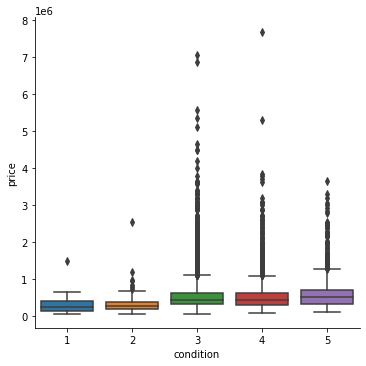

In [103]:
sns.catplot(x='condition', y='price', kind='box', data=df)

In [104]:
# pd.get_dummies(df['grade'])

In [105]:
# df_dummy = pd.get_dummies(df, columns=['grade'], drop_first=True)

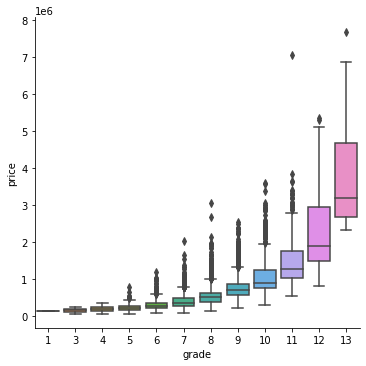

In [106]:
sns.catplot(x='grade', y='price', kind='box', data=df)

In [107]:
# pd.get_dummies(df['waterfront'])

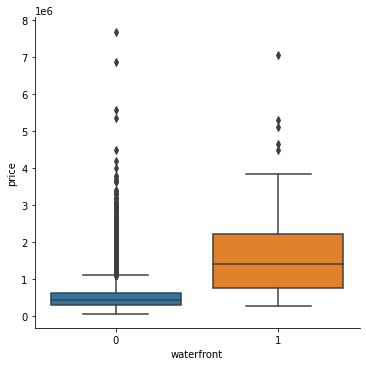

In [108]:
sns.catplot(x='waterfront', y='price', kind='box', data=df)

In [109]:
# pd.get_dummies(df['view'])

In [110]:
# df_dummy = pd.get_dummies(df, columns=['view'], drop_first=True)

In [111]:
# df_dummy

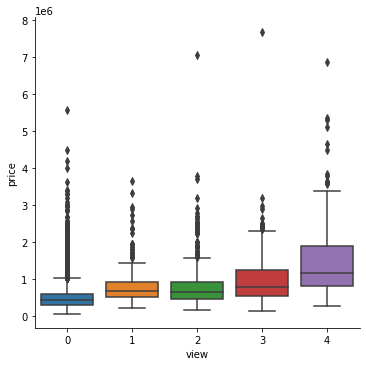

In [112]:
sns.catplot(x='view', y='price', kind='box', data=df)

In [113]:
# if df[df['yr_renovated'] != 0]:
#     df['yr_renovated'] = 2020 - (df['yr_renovated'].values)

In [114]:
df['renovation_age'] = np.where(df['yr_renovated']>0, 2020 - df['yr_renovated'], 0)

In [115]:
df[df['renovation_age'] != 0]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovation_age
11,3971700580,385000.0,3.0,1.75,1930,14389,1.0,0,0,3,7,1130,800,1963,1998,98155,47.7733,-122.317,1730,14378,22
33,16000200,250000.0,3.0,2.25,1640,4420,2.0,0,0,4,7,1640,0,1918,1983,98002,47.3110,-122.210,1230,6632,37
67,7204200025,1225000.0,4.0,2.50,3120,49456,2.0,1,4,4,9,2590,530,1974,1989,98198,47.3535,-122.323,2030,32181,31
186,3603000410,174950.0,2.0,1.00,730,6000,1.0,0,0,3,6,730,0,1950,1985,98198,47.3832,-122.300,1750,7200,35
227,5315100737,900000.0,6.0,2.75,2300,24773,1.5,0,0,4,9,2300,0,1950,1985,98040,47.5833,-122.242,2720,11740,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17229,868000905,950000.0,3.0,2.50,3480,7800,1.0,0,0,4,7,1750,1730,1941,1998,98177,47.7047,-122.378,3010,9918,22
17235,1423069102,430000.0,3.0,2.50,2000,35438,2.0,0,0,3,7,2000,0,1968,2005,98027,47.4733,-121.994,2000,51836,15
17239,723049301,335000.0,2.0,1.75,1660,11437,2.0,0,0,3,7,1660,0,1958,1992,98146,47.4899,-122.339,1290,7860,28
17248,3586500770,808000.0,3.0,1.75,2590,32380,1.0,0,0,3,8,2590,0,1951,1994,98177,47.7539,-122.370,2340,28456,26


In [116]:
#create renovation dummy here
pd.get_dummies(df['yr_renovated'])

,0,1934,1940,1944,1945,1946,1948,1950,1951,1953,1955,1956,1957,1958,1959,1960,1962,1963,1964,1965,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17286,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17287,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17288,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [117]:
# df_dummy = pd.get_dummies(df, columns=['condition', 'view', 'grade'], drop_first=True)

In [118]:
# df_dummy

### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

In [119]:
now = pd.to_datetime('now')
now

Timestamp('2020-12-03 20:14:35.321424')

In [120]:
# df[df['yr_renovated'] != 0]

In [255]:
# df['yr_renovated'] = 2020 - (df['yr_renovated'].values)

In [305]:
# df.tail(15)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17275,17275,8651520400,20140612T000000,610750.0,4.0,2.25,2180,7297,2.0,0,0,3,8,2180,0,36,2020,98074,47.6459,-122.058,2250,9781
17276,17276,1777600850,20140624T000000,859000.0,4.0,2.25,3550,13900,1.0,0,0,3,8,1830,1720,10,2020,98006,47.5681,-122.127,2770,12200
17277,17277,3797300110,20141027T000000,330000.0,3.0,2.00,2500,10697,1.0,0,0,3,8,2500,0,26,2020,98022,47.1927,-122.010,2560,9772
17278,17278,3541600210,20140618T000000,410000.0,4.0,2.00,1970,10500,1.0,0,0,3,8,1820,150,59,2020,98166,47.4790,-122.356,2090,12300
17279,17279,1925059254,20150507T000000,2998000.0,5.0,4.00,6670,16481,2.0,0,0,3,12,4960,1710,13,2020,98004,47.6409,-122.221,4800,16607
17280,17280,2568300040,20140819T000000,709050.0,4.0,3.50,2720,9000,2.0,0,0,3,8,2670,50,23,2020,98125,47.7034,-122.297,1960,7772
17281,17281,1251200045,20140620T000000,1462500.0,5.0,3.25,3840,4800,3.0,0,3,3,10,2750,1090,12,2020,98144,47.5929,-122.290,2060,4800
17282,17282,7625704510,20141022T000000,850000.0,4.0,3.25,3450,6500,2.0,0,0,3,8,2450,1000,26,2020,98136,47.5437,-122.388,1750,6500
17283,17283,1233100366,20141215T000000,500000.0,3.0,1.50,1680,17409,1.0,0,0,3,7,1680,0,58,2020,98033,47.6766,-122.176,1680,9101
17284,17284,2078500350,20140604T000000,560000.0,3.0,2.50,2070,12708,2.0,0,0,3,8,2070,0,24,2020,98056,47.5295,-122.180,2620,9617


### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column?

done above

### <ins>Non-linear transformations</ins>

### 4.4) Create a polynomial feature for two of your continuous variables.

In [58]:
# from scipy.stats import ttest_ind, ttest_ind_from_stats
# from scipy.special import stdtr
# t, p_value = ttest_ind(df['sqft_living'].values, df['yr_built'].values, equal_var=True)
# print(p_value)

In [59]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovation_age,age
0,2591820310,365000.0,4.0,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,0,34
1,7974200820,865000.0,5.0,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,0,43
2,7701450110,1038000.0,4.0,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,0,23
3,9522300010,1490000.0,3.0,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,0,30
4,9510861140,711000.0,3.0,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,0,16


In [121]:
df['age'] = 2020 - df['yr_built']

In [122]:
df['age']

0        34
1        43
2        23
3        30
4        16
         ..
17285    62
17286    72
17287    67
17288    49
17289    68
Name: age, Length: 17290, dtype: int64

In [123]:
df_dummy = pd.get_dummies(df, columns=['condition', 'view', 'grade'], drop_first=True)

In [124]:
# features = ['sqft_living', 'age']

In [125]:
# df_features = df[features]

In [126]:
target = df['price']

In [127]:
# df_features.describe()

In [128]:
# df_features

In [129]:
df_dummy.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'renovation_age', 'age', 'condition_2', 'condition_3', 'condition_4',
       'condition_5', 'view_1', 'view_2', 'view_3', 'view_4', 'grade_3',
       'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'grade_10', 'grade_11', 'grade_12', 'grade_13'],
      dtype='object')

In [130]:
features = ['sqft_living', 'sqft_lot', 'view_3', 'view_1', 'view_2', 'view_4', 'waterfront', 'condition_2', 'condition_3',
            'condition_4', 'condition_5', 'grade_3', 'grade_4', 'grade_5','grade_6', 'grade_7', 'grade_8', 'grade_9',
           'grade_10', 'grade_11', 'grade_12', 'grade_13', 'yr_renovated', 'age', 'sqft_basement', 'sqft_above']

In [131]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

In [132]:
poly_data = poly.fit_transform(df_dummy[features])

In [133]:
poly_data

array([[2.07000e+03, 8.89300e+03, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 4.28490e+06],
       [2.90000e+03, 6.73000e+03, 0.00000e+00, ..., 1.14490e+06,
        1.95810e+06, 3.34890e+06],
       [3.77000e+03, 1.08930e+04, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.42129e+07],
       ...,
       [1.05000e+03, 9.87600e+03, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.10250e+06],
       [1.90000e+03, 4.31860e+04, 0.00000e+00, ..., 3.60000e+05,
        7.80000e+05, 1.69000e+06],
       [1.33000e+03, 6.76800e+03, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.76890e+06]])

In [134]:
poly_columns = poly.get_feature_names(features)

In [135]:
df_poly = pd.DataFrame(poly_data, columns=poly_columns)

In [136]:
df_poly.head()

,sqft_living,sqft_lot,view_3,view_1,view_2,view_4,waterfront,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,yr_renovated,age,sqft_basement,sqft_above,sqft_living^2,sqft_living sqft_lot,sqft_living view_3,sqft_living view_1,sqft_living view_2,sqft_living view_4,sqft_living waterfront,sqft_living condition_2,sqft_living condition_3,sqft_living condition_4,sqft_living condition_5,sqft_living grade_3,sqft_living grade_4,sqft_living grade_5,sqft_living grade_6,sqft_living grade_7,sqft_living grade_8,sqft_living grade_9,sqft_living grade_10,sqft_living grade_11,sqft_living grade_12,sqft_living grade_13,sqft_living yr_renovated,sqft_living age,...,grade_8 grade_13,grade_8 yr_renovated,grade_8 age,grade_8 sqft_basement,grade_8 sqft_above,grade_9^2,grade_9 grade_10,grade_9 grade_11,grade_9 grade_12,grade_9 grade_13,grade_9 yr_renovated,grade_9 age,grade_9 sqft_basement,grade_9 sqft_above,grade_10^2,grade_10 grade_11,grade_10 grade_12,grade_10 grade_13,grade_10 yr_renovated,grade_10 age,grade_10 sqft_basement,grade_10 sqft_above,grade_11^2,grade_11 grade_12,grade_11 grade_13,grade_11 yr_renovated,grade_11 age,grade_11 sqft_basement,grade_11 sqft_above,grade_12^2,grade_12 grade_13,grade_12 yr_renovated,grade_12 age,grade_12 sqft_basement,grade_12 sqft_above,grade_13^2,grade_13 yr_renovated,grade_13 age,grade_13 sqft_basement,grade_13 sqft_above,yr_renovated^2,yr_renovated age,yr_renovated sqft_basement,yr_renovated sqft_above,age^2,age sqft_basement,age sqft_above,sqft_basement^2,sqft_basement sqft_above,sqft_above^2
0,2070.0,8893.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,0.0,2070.0,4284900.0,18408510.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2070.0,0.0,0.0,0.0,0.0,0.0,0.0,2070.0,0.0,0.0,0.0,0.0,0.0,0.0,70380.0,...,0.0,0.0,34.0,0.0,2070.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1156.0,0.0,70380.0,0.0,0.0,4284900.0
1,2900.0,6730.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0,1070.0,1830.0,8410000.0,19517000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2900.0,0.0,0.0,0.0,0.0,0.0,2900.0,0.0,0.0,0.0,0.0,0.0,0.0,124700.0,...,0.0,0.0,43.0,1070.0,1830.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1849.0,46010.0,78690.0,1144900.0,1958100.0,3348900.0
2,3770.0,10893.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,23.0,0.0,3770.0,14212900.0,41066610.0,0.0,0.0,3770.0,0.0,0.0,0.0,3770.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3770.0,0.0,0.0,0.0,86710.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,23.0,0.0,3770.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,529.0,0.0,86710.0,0.0,0.0,14212900.0
3,4560.0,14608.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0,0.0,4560.0,20793600.0,66612480.0,0.0,0.0,4560.0,0.0,0.0,0.0,4560.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4560.0,0.0,0.0,136800.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0,0.0,4560.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,900.0,0.0,136800.0,0.0,0.0,20793600.0
4,2550.0,5376.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,2550.0,6502500.0,13708800.0,0.0,0.0,0.0,0.0,0.0,0.0,2550.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2550.0,0.0,0.0,0.0,0.0,0.0,40800.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,2550.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,256.0,0.0,40800.0,0.0,0.0,6502500.0


In [137]:
df.shape

(17290, 22)

In [138]:
df_poly.shape

(17290, 377)

### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable.

In [278]:
# from sklearn.preprocessing import PolynomialFeatures

# # poly = PolynomialFeatures(degree=2, include_bias=False)

In [279]:
# poly_data_1 = poly.fit_transform(df_features_1)

In [280]:
# poly_data_1

array([[2.07000e+03, 0.00000e+00, 4.28490e+06, 0.00000e+00, 0.00000e+00],
       [2.90000e+03, 0.00000e+00, 8.41000e+06, 0.00000e+00, 0.00000e+00],
       [3.77000e+03, 2.00000e+00, 1.42129e+07, 7.54000e+03, 4.00000e+00],
       ...,
       [1.05000e+03, 0.00000e+00, 1.10250e+06, 0.00000e+00, 0.00000e+00],
       [1.90000e+03, 0.00000e+00, 3.61000e+06, 0.00000e+00, 0.00000e+00],
       [1.33000e+03, 0.00000e+00, 1.76890e+06, 0.00000e+00, 0.00000e+00]])

In [281]:
# poly_columns_1 = poly.get_feature_names(df_features_1.columns)

In [282]:
# poly_columns_1

['sqft_living', 'view', 'sqft_living^2', 'sqft_living view', 'view^2']

In [283]:
# df_poly_1 = pd.DataFrame(poly_data_1, columns=poly_columns_1)

In [284]:
# df_poly_1.head()

,sqft_living,view,sqft_living^2,sqft_living view,view^2
0,2070.0,0.0,4284900.0,0.0,0.0
1,2900.0,0.0,8410000.0,0.0,0.0
2,3770.0,2.0,14212900.0,7540.0,4.0
3,4560.0,2.0,20793600.0,9120.0,4.0
4,2550.0,0.0,6502500.0,0.0,0.0


In [285]:
# df_features_1.shape

(17290, 2)

In [286]:
# df_poly_1.shape

(17290, 5)

## Step 5: Train-Test Split

If you plan on doing any scaling of your data, make sure it is done at the appropriate time. 

### 5.1) Perform a train-test split of the data.

In [139]:
#improt train_test_split from sklearn package
from sklearn.model_selection import train_test_split

#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(df_poly, target, random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13832, 377) Target:  (13832,)
Test set - Features:  (3458, 377) Target:  (3458,)


In [140]:
# fit a model
from sklearn import linear_model

#instantiate a linear regression object
lm = linear_model.LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)


print(lm.intercept_)
print(lm.coef_)

993135.784829966
[ 2.78207472e+02 -1.55240735e+01  3.26489934e+03  1.32602253e+05
  6.37434910e+04  2.44945209e+05 -2.40096181e+05 -3.90324911e+05
 -2.98732686e+05 -2.42213794e+05 -2.03287536e+05  2.76828222e+00
  1.31838233e+05 -3.36351949e+04 -1.43815417e+03 -1.29748885e+05
  1.32777872e+05 -7.72597848e+04  6.41284497e+03  1.86033097e+05
  2.26332839e+05 -4.41313861e+05 -8.57581273e+02 -1.16936202e+04
  4.97476696e+02 -2.18621436e+02 -3.79202059e-02  2.57804900e-01
 -1.99763351e+01  7.56625935e+00 -1.68181907e+01 -4.52906340e+01
  2.58162998e+02 -1.23192497e+02 -2.09964472e+02 -1.93675344e+02
 -1.74583973e+02 -1.98667956e-05  1.30198682e+02 -8.37103186e+01
 -5.61777815e+01 -3.33021692e+01 -2.48208347e+01  1.76987964e+01
  2.78645631e+01  3.49781896e+01  1.54322674e+02  1.14622727e+02
  1.97598417e-02  2.50224992e-01  1.45626494e-02  4.76241018e-02
  8.72447345e-07 -1.93492135e-01  2.20331778e-01 -2.56186733e-01
 -1.08557288e+00 -3.80019308e+00  4.11206428e-01  6.62380262e-01
  2.7766

Use the model to predict on the training set and the test set

In [141]:
y_pred = lm.predict(X_test)
y_pred

array([ 422596.7820862 ,  321765.98556716, 1378208.21705399, ...,
        331339.58607777,  522065.57107516,  456279.74921526])

In [142]:
print ("Score:", lm.score(X_test, y_test))

Score: 0.7049648786639098


### 5.2) Fit your scaler to training the data.

In [91]:
# # fit a model
# from sklearn import linear_model

# #instantiate a linear regression object
# lm = linear_model.LinearRegression()

# #fit the linear regression to the data
# lm = lm.fit(X_train, y_train)


# print(lm.intercept_)
# print(lm.coef_)

In [92]:
# scaler = StandardScaler()

# # fit the scaler to the training data
# scaler.fit(X_train)

# #transform the training data
# X_train = pd.DataFrame(data=scaler.transform(X_train), columns=df_features.columns)

# #transform the testing dat
# X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_features.columns)

### 5.4) Fit the model to the training data.

In [93]:
# #instantiate a linear regression object
# lm_2 = LinearRegression()

# #fit the linear regression to the data
# lm_2 = lm_2.fit(df_poly, target)

# #access output
# # print(lm_2.intercept_)
# # print(lm_2.coef_)
# print("R^2: ", lm_2.score(df_poly, target))

In [94]:
# #instantiate a linear regression object
# lm_2 = LinearRegression()

# #fit the linear regression to the data
# lm_2 = lm_2.fit(df_poly_1, target)

# #access output
# # print(lm_2.intercept_)
# # print(lm_2.coef_)
# print("R^2: ", lm_2.score(df_poly_1, target))

### 5.5) Use the model to predict on the training set and the test set.

In [143]:
y_pred = lm.predict(X_test)

In [144]:
print ("Score:", lm.score(X_test, y_test))

Score: 0.7049648786639098


### 5.6) Evaluate the training and test predictions using RMSE.

In [145]:
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error:129818.96803351061
Mean Squared Error:42165917894.00345
Root Mean Squared Error:205343.41453770426


In [146]:
price_std = target.std()
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.34774274929294696
Root Mean Squared Error Z: 0.5500481524557346


### 5.7) Determine if your model is overfit.

In [147]:
y_train_prediction = lm.predict(X_train)

In [148]:
test_mae = metrics.mean_absolute_error(y_train, y_train_prediction)
test_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_prediction))


print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_train, y_train_prediction)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_train, y_train_prediction)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_train, y_train_prediction))))

Mean Absolute Error:125315.76917569709
Mean Squared Error:34695261121.29485
Root Mean Squared Error:186266.6398507657


Because the train and test are relatively similiar I'm not overfitting. 

## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models.

### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [158]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=30)

selector.fit(X_train, y_train)

C:\Users\berns\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


SelectKBest(k=30, score_func=<function f_regression at 0x0000024181113310>)

In [159]:
selector.fit(X_train, y_train)
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

C:\Users\berns\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


In [160]:
selected_columns

Index(['sqft_living', 'grade_10', 'grade_11', 'grade_12', 'sqft_basement',
       'sqft_above', 'sqft_living^2', 'sqft_living view_4',
       'sqft_living waterfront', 'sqft_living condition_3',
       'sqft_living grade_10', 'sqft_living grade_11', 'sqft_living grade_12',
       'sqft_living age', 'sqft_living sqft_basement',
       'sqft_living sqft_above', 'view_4 sqft_above', 'waterfront sqft_above',
       'grade_10^2', 'grade_10 age', 'grade_10 sqft_above', 'grade_11^2',
       'grade_11 age', 'grade_11 sqft_above', 'grade_12^2',
       'grade_12 sqft_above', 'age sqft_above', 'sqft_basement^2',
       'sqft_basement sqft_above', 'sqft_above^2'],
      dtype='object')

In [162]:
removed_columns

Index(['sqft_lot', 'view_3', 'view_1', 'view_2', 'view_4', 'waterfront',
       'condition_2', 'condition_3', 'condition_4', 'condition_5',
       ...
       'grade_13 yr_renovated', 'grade_13 age', 'grade_13 sqft_basement',
       'grade_13 sqft_above', 'yr_renovated^2', 'yr_renovated age',
       'yr_renovated sqft_basement', 'yr_renovated sqft_above', 'age^2',
       'age sqft_basement'],
      dtype='object', length=347)

In [161]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=100, normalize=False)

lasso.fit(X_train[selected_columns],y_train)

y_train_pred_lasso = lasso.predict(X_train[selected_columns])
y_pred_lasso = lasso.predict(X_test[selected_columns])

train_rmse_lasso01 = metrics.mean_absolute_error(y_train, y_train_pred_lasso)
test_rmse_lasso01 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))
print('Training Error: '+ str(train_rmse_lasso01) )
print('Testing Error: '+ str(test_rmse_lasso01) )

Training Error: 148862.33458373573
Testing Error: 240775.20443033162


C:\Users\berns\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 323756375698571.06, tolerance: 191529062678.72354
  model = cd_fast.enet_coordinate_descent(


### 6.2) After removing the features, re-run Step 5 and see if your new model performs better than the old model.

In [8]:
# your code here

## Step 7: Evaluate your different models in order to determine the best model overall.

## Step 8:  Refit your best model to the entire dataset.

## Step 9: Save your final model using pickle.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/